In [1]:
import sys
import os
# Ruta absoluta a tu proyecto principal
ruta_base = "/home/aarriero/Documents/Angela_cmb/four_year/"
# Agregar al sys.path (al inicio para prioridad)
sys.path.insert(0, ruta_base)
print(ruta_base)


sys.path.append(os.path.join(ruta_base, "general_documents/definitions_files"))
from Definiciones_stokes_TMS import modulosCuadrados
from Definiciones_stokes_TMS import reemplazo_stokes
from Definiciones_stokes_TMS import reemplazo_conjugados
from Definiciones_stokes_TMS import reemplazo_names
from Definiciones_stokes_TMS import reemplazo_fases
from Definiciones_stokes_TMS import reemplazo_unidad

from Definiciones_stokes_TMS import RF_components_behavior
from Definiciones_stokes_TMS import RF_components_behavior2
from Definiciones_stokes_TMS import TMS_results
from convert_csv_files_inputsignals_tosimulate import datos_componente
from convert_csv_files_inputsignals_tosimulate import datos_componente2
from convert_csv_files_inputsignals_tosimulate import datos_componente3

from convert_csv_files_inputsignals_tosimulate import sparams_to_power
from convert_csv_files_inputsignals_tosimulate import datos_simulados_RI
from convert_csv_files_inputsignals_tosimulate import conversion_dc
from convert_csv_files_inputsignals_tosimulate import desplazar_en_frecuencia
from convert_csv_files_inputsignals_tosimulate import min_max
from convert_csv_files_inputsignals_tosimulate import min_max2
from convert_csv_files_inputsignals_tosimulate import min_max3


/home/aarriero/Documents/Angela_cmb/four_year/


/home/aarriero/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import toml
# Carpeta donde está tu archivo TOML
ruta_toml = os.path.join(ruta_base, "general_documents", "data_files")
# Nombre del archivo TOML
toml_name = "input_params_simulation_V1_def"
toml_file = os.path.join(ruta_toml, toml_name + ".toml")
print("Ruta completa del archivo:", toml_file)
# Cargar el archivo TOML
data = toml.load(toml_file)
print("Archivo cargado correctamente")

Ruta completa del archivo: /home/aarriero/Documents/Angela_cmb/four_year/general_documents/data_files/input_params_simulation_V1_def.toml
Archivo cargado correctamente


In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import re, im, I, E, symbols

In [4]:
n=data["Sky"]["n"]

In [13]:
n=data["Sky"]["n"]
SPOw=np.ones(n)*pow(10,data["SPO"]["Window"]/10)
RLirf=np.ones(n)*pow(10,(data["IRfilter"]["RL"]/10))
SPOirf=np.ones(n)*pow(10,data["SPO"]["IRfilter"]/10)
RLlna1s=np.ones(n)*pow(10,(data["LNA1"]["RL"]/10))
RLlna2s=np.ones(n)*pow(10,(data["LNA2"]["RL"]/10))
RLlna3l=np.ones(n)*pow(10,(data["LNA3"]["RL"]/10))
RLlna4l=np.ones(n)*pow(10,(data["LNA4"]["RL"]/10))


##############  BACK-END 
## AMPLIFIERS BEM
### https://qpmw.com/product/amplifiers/low-noise/amlna-0120-01/#!prettyPhoto
RlnaBEM=np.ones(n)*pow(10,(data["BEM_amp"]["RL"]/10)) # Return Loss 
GainBEM=np.ones(n)*pow(10,(data["BEM_amp"]["Gain"]/10)) # Gain 
## FILTER
RfilBem=np.ones(n)*pow(10,(data["BEM_filter"]["RL"]/10)) # Return Loss
IfilBem=np.ones(n)*pow(10,(data["BEM_filter"]["IL"]/10)) # Insertion Loss


#### AMPLIFIERS DC
###https://www.mouser.com/datasheet/2/1030/PHA_202_2b-1700733.pdf?srsltid=AfmBOoqVZ1XoPo0bhApVXruea505aW-8BDN38TfeyBMXNrZrS3EYFWaa
RlnaDC=np.ones(n)*pow(10,(data["DC_amp"]["RL"]/10)) # Return Loss 
GainDC=np.ones(n)*pow(10,(data["DC_amp"]["Gain"]/10)) # Gain

##### FILTER
TfilDC=np.ones(n)*300  # T. filter == T.room
IfilDC=np.ones(n)*pow(10,(data["DC_filter"]["IL"]/10)) # Insertion Loss
RfilDC=np.ones(n)*pow(10,(data["DC_filter"]["RL"]/10)) # Return Loss


##########------------------------##################################
    ################################## INITIAL PARAMETERS - signals shown in figure 3 (paper angela)
    ##########------------------------##################################
ruta_files_n = os.path.join(ruta_base, "general_documents", "data_files")
f1_file = os.path.join(ruta_files_n , "rl_hyb.csv")
f2_file = os.path.join(ruta_files_n , "IL_hyb.csv")
f3_file = os.path.join(ruta_files_n , "IL_omt.csv")
#f4_file = os.path.join(ruta_files_n , "RL_omt.csv")
f4_file = os.path.join(ruta_files_n , "OMT_measure_R.csv")
f5_file = os.path.join(ruta_files_n , "RL_feedhorn.csv")
f6_file = os.path.join(ruta_files_n , "RL_window.csv")
f7_file = os.path.join(ruta_files_n , "LNA_20C.csv")
f8_file = os.path.join(ruta_files_n , "CR117_load_RL.csv")
f9_file = os.path.join(ruta_files_n , "TN_20_C.csv")
f10_file = os.path.join(ruta_files_n , "noise_lna_amp_roomT.csv")
f11_file = os.path.join(ruta_files_n , "gain_lna_amp_roomT.csv")
f12_file = os.path.join(ruta_files_n , "GAIN_DC.csv")
f13_file = os.path.join(ruta_files_n , "Noise_figu_DC.csv")
f14_file = os.path.join(ruta_files_n , "TMS_IR_filter_10_layers_IL_10-20GHz.csv")
    
Q,W,E,R,Z,X,C,V,xx1,data_RL_W,data_RL_FH,data_RL_omt,data_IL_omt,data_IL_hyb,data_RL_hyb,data_gain_lna,N,M,data_RL_load,U,Qs,Ws,Es,Rs,noise_lna_amp_roomT,N1,N2,N3,N4,Un1,Un2,Un3,Un4,sfN1=datos_simulados_RI(n,f1_file,f2_file,f3_file,f4_file,f5_file,f6_file,f7_file,f8_file,f9_file,f10_file)
x_fit,y_fit_IRfilter_il =datos_componente3(f14_file,n,0)
IL_irfilter_t=y_fit_IRfilter_il
    
x_fit2,y_fit_window_il =datos_componente3(f14_file,n,-0.05)
    
x_fit3,y_fit_Q_il =datos_componente3(f14_file,n,-0.1)
x_fit3,y_fit_OMT_il =datos_componente3(f14_file,n,-0.35)#-0.35
min_max3(y_fit_OMT_il)

Q=y_fit_Q_il
#R=Rs #### il Window
R=y_fit_window_il
    
E=IL_irfilter_t ## il IRfilter
Wl=Q## il FH
Ws=Q 
Vl=V ## rl FH
Vs=V 
Xl=X ## RL OMT
Xs=X 
Ql=y_fit_OMT_il ## IL OMT
Qs=y_fit_OMT_il 
    
C1=C ## RL HYB
Q1=Q ## IL HYB
C2=C 
Q2=Q 

#TnBem_var=(noise_lna_amp_roomT-np.mean(noise_lna_amp_roomT))*(np.mean(TnBem)/np.mean(noise_lna_amp_roomT))+np.mean(TnBem)
freq11, data_res11,xdup_freq11,ydup_dat11,xx11,gain_lna_amp_roomT =datos_componente(f11_file,n) #gainLNAtroom
new_gain_lna_troom=sparams_to_power(gain_lna_amp_roomT,n) ### used to simulate the gain in the BEM AMPL
GainBEM=new_gain_lna_troom
################# DC NOISE AND GAIN
    
freq12, data_res12,xdup_freq12,ydup_dat12,xx11,gain_amp_DC =datos_componente2(f12_file,n) #gainampl DC
new_gain_DC_troom=sparams_to_power(gain_amp_DC,n) ###
    
GainDC=new_gain_DC_troom
TnDC_conve=conversion_dc(f13_file,n)
TnDC=TnDC_conve
    
G1=N # GAIN
GainBEM=new_gain_lna_troom
GainDC=new_gain_DC_troom


base_pow 0.0025472420751407776
base_db 0.011077272727272727
pow 0.0023972420751407785
db -0.010424052831003046
base_pow 0.0025472420751407776
base_db 0.011077272727272727
pow 0.01384414741820192
db -0.06054490977757604
base_pow 0.0025472420751407776
base_db 0.011077272727272727
pow 0.025160021119330106
db -0.11066716973080584
base_pow 0.0025472420751407776
base_db 0.011077272727272727
pow 0.07982581492037763
db -0.36130009284300124
-0.3575357905118142 -0.3650665694231193


In [32]:
homts=((np.ones(n)-Xs)*(np.ones(n)-Qs))
homtl=((np.ones(n)-Xl)*(np.ones(n)-Ql))
print(np.shape(homts))
print(np.mean(homts))

hhyb1=((np.ones(n)-C1)*(np.ones(n)-Q1))
hhyb2=((np.ones(n)-C2)*(np.ones(n)-Q2))
print(np.shape(hhyb1))
print(np.mean(hhyb1))


hw=(np.ones(n)-Z)*(np.ones(n)-R)*(np.ones(n)-SPOw)
print(np.mean(hw))
hirf=(np.ones(n)-RLirf)*(np.ones(n)-E)*(np.ones(n)-SPOirf)
print(np.mean(hirf))
hfhs=(np.ones(n)-Vs)*(np.ones(n)-Wl)
hfhl=(np.ones(n)-Vl)*(np.ones(n)-Wl)
print(np.mean(hfhs))

hlna1=(1-RLlna1s)
hlna2=(1-RLlna2s)
hlna3=(1-RLlna3l)
hlna4=(1-RLlna4l)

#####################
hlnaBEM=(1-RlnaBEM)
hfilterBEM=((1-RfilBem)*(1-IfilBem))
##################  DOWN-CONVERTER
hlnaDC=(1-RlnaDC)
hfilDC=np.ones(n)*((1-RfilDC)*(1-IfilDC))


(1000,)
0.9101897243670118
(1000,)
0.9726039100217433
0.9755957096959317
0.9875279676725761
0.9742367557262155


In [16]:
lmd_os1,lmd_os2,e_os,phi_os1,phi_os2,phi_os3=symbols('lambda_os1,lambda_os2,epsilon_os,phi_os1,phi_os2,phi_os3')
lmd_ol1,lmd_ol2,e_ol,phi_ol1,phi_ol2,phi_ol3=symbols('lambda_ol1,lambda_ol2,epsilon_ol,phi_ol1,phi_ol2,phi_ol3')
g1,g2,g3,g4,xsky,xload,ysky,yload,g=symbols('g1,g2,g3,g4,xsky,xload,ysky,yload,g')
g1c,g2c,g3c,g4c,xskyc,xloadc,yskyc,yloadc=symbols('g1c,g2c,g3c,g4c,xskyc,xloadc,yskyc,yloadc')
Isky,Qsky,Usky,Vsky=symbols('Isky,Qsky,Usky,Vsky')
Iload,Qload,Uload,Vload=symbols('Iload,Qload,Uload,Vload')

Osx,Osy,Osa,Olx,Oly,Ola=symbols('Osx,Osy,Osa,Olx,Oly,Ola')
theta_os1,theta_os2,theta_os3=symbols('theta_os1,theta_os2,theta_os3', real=True)
theta_ol1,theta_ol2,theta_ol3=symbols('theta_ol1,theta_ol2,theta_ol3', real=True)

lmd_h11_1,lmd_h11_4,e_h11,phi_h11_1,phi_h11_2,phi_h11_3=symbols('lambda_h11_1,lambda_h11_4,epsilon_h11,phi_h11_1,phi_h11_2,phi_h11_3')
lmd_h12_1,lmd_h12_4,e_h12,phi_h12_1,phi_h12_2,phi_h12_3=symbols('lambda_h12_1,lambda_h12_4,epsilon_h12,phi_h12_1,phi_h12_2,phi_h12_3')

k,k2,k3,k4,k5,k6,k7,k8,k9=symbols('k,k2,k3,k4,k5,k6,k7,k8,k9')

In [ ]:
np.mean(hlnaBEM)

In [ ]:
#### to simulate only the fem
"""""
outputI1=[]
outputI2=[]
outputI=[]
#for i in range(0, len(xx1), int(len(xx1)/40)):
for i in range(len(xx1)):
    k=np.sqrt(hw[i])
    k2=np.sqrt(hirf[i])
    k3=np.sqrt(hfhs[i])
    k4=np.sqrt(hfhl[i])
    k5=np.sqrt(hlna1[i])
    k6=np.sqrt(hlna2[i])
    k7=np.sqrt(hlna3[i])
    k8=np.sqrt(hlna4[i])
        
    ### OPTICAL COMPONENTS
    signal_W=np.array([[(1),(0)],[(0),(1)]])
    att_signal1=np.array([[k,0],[0,k]])

    signal_IRf=np.array([[(1),(0)],[(0),(1)]])
    att_signal2=np.array([[k2,0],[0,k2]])

    signal_fedhSky=np.array([[(1),(0)],[(0),(1)]])
    att_signal3=np.array([[k3,0],[0,k3]])

    signal_fedhLoad=np.array([[(1),(0)],[(0),(1)]])
    att_signal4=np.array([[k4,0],[0,k4]])

    #### attenuation
    att_signal5=np.array([[k5,0],[0,k6]])
    att_signal7=np.array([[k7,0],[0,k8]])

    #### OMT ###########
    ############################
    lmd_os1=np.sqrt(homts[i])
    e_os=0
    #phi_os1=0
    #phi_os2=0
    #phi_os3=0
    lmd_os2=np.sqrt(homts[i])
    #lmd_os2=lmd_os1
    #OMTsky=np.array([[(1+lmd_os1),(e_os)*phi_os1],[(e_os)*phi_os2,(1+lmd_os2)*phi_os3]])
    OMTsky=np.array([[(lmd_os1),(e_os)*phi_os1],[(e_os)*phi_os2,(lmd_os2)*phi_os3]])
    lmd_ol1=np.sqrt(homtl[i])
    e_ol=0
    #phi_ol1=0
    #phi_ol2=0
    #phi_ol3=0
    lmd_ol2=np.sqrt(homtl[i])
    #lmd_ol2=lmd_ol1
    #OMTload=np.array([[(1+lmd_ol1),(e_ol)*phi_ol1],[(e_ol)*phi_ol2,(1+lmd_ol2)*phi_ol3]])
    OMTload=np.array([[(lmd_ol1),(e_ol)*phi_ol1],[(e_ol)*phi_ol2,(lmd_ol2)*phi_ol3]])

    ######### HYBX #######
    lmd_h11_1= np.sqrt(hhyb1[i])
    e_h11=0
    lmd_h11_4= np.sqrt(hhyb1[i])
    #HYB11=(1/np.sqrt(2))*np.array([[(1+lmd_h11_1),phi_h11_3*(1+e_h11)],[phi_h11_1*(1+e_h11),-phi_h11_2*(1+lmd_h11_4)]])
    HYB11=(1/np.sqrt(2))*np.array([[(lmd_h11_1),phi_h11_3*lmd_h11_1],
     [phi_h11_1*(lmd_h11_1),-phi_h11_2*(lmd_h11_4)]])

    ######### HYBY #######
    lmd_h12_1= np.sqrt(hhyb2[i])
    e_h12=0
    lmd_h12_4=np.sqrt(hhyb2[i])
    #HYB12=(1/np.sqrt(2))*np.array([[(1+lmd_h12_1),phi_h12_3*(1+e_h12)],[phi_h12_1*(1+e_h12),-phi_h12_2*(1+lmd_h12_4)]])
    HYB12=(1/np.sqrt(2))*np.array([[(lmd_h12_1),phi_h12_3*(lmd_h12_1)],
     [phi_h12_1*(lmd_h12_1),-phi_h12_2*(lmd_h12_4)]])

    ###### LNA ######
    LNA11=np.array([[1,0],[0,1]])
    LNA12=np.array([[1,0],[0,1]])
    n1_2=np.array([[0],[0]])
    n3_4=np.array([[0],[0]])

    ##### BEM
    BEM1_2=np.array([[1,0],[0,1]])
    BEM3_4=np.array([[1,0],[0,1]])
    n1_2F=np.array([[0],[0]])
    n3_4F=np.array([[0],[0]])

    C1_tot,C2_tot,D1_tot,D2_tot,A1_2,B1_2= RF_components_behavior2(signal_W,signal_fedhLoad,OMTsky,OMTload,HYB11,HYB12,LNA11,LNA12,n1_2,n3_4,att_signal1,att_signal2,att_signal3,att_signal4,att_signal5,att_signal7,BEM1_2,BEM3_4,n1_2F,n3_4F)

    O1,O2,O3,O4,O5,O6,O7,O8=TMS_results(C1_tot,C2_tot,D1_tot,D2_tot)
    
    outputI1.append(O1.subs(Isky,1))
    outputI2.append(O5.subs(Iload,1))
    #outputI.append(O1)

array_numerico_outputI1 = np.array(outputI1).flatten() 
array_numerico_outputI2 = np.array(outputI2).flatten() 

np.savez('./results_files/datos_betas_jonesmatrix_fem.npz', 
         freq=xx1, 
         outputI1=array_numerico_outputI1, 
         outputI2=array_numerico_outputI2, 
         )
"""""

In [17]:
#### to simulate fem+bem+dc
"""""
outputI1=[]
outputI2=[]
outputI=[]
#for i in range(0, len(xx1), int(len(xx1)/40)):
for i in range(len(xx1)):
    k=np.sqrt(hw[i])
    k2=np.sqrt(hirf[i])
    k3=np.sqrt(hfhs[i])
    k4=np.sqrt(hfhl[i])
    k5=np.sqrt(hlna1[i])
    k6=np.sqrt(hlna2[i])
    k7=np.sqrt(hlna3[i])
    k8=np.sqrt(hlna4[i])
    
    #k9=np.sqrt(((hlnaBEM[i]*hfilterBEM[i]*hlnaDC[i]*hfilDC[i]))/((G1[i]**2)*GainBEM[i])) ##old
    
    k9=np.sqrt(((hlnaBEM[i]*hfilterBEM[i]*hlnaDC[i]*hfilDC[i])*G1[i]*GainBEM[i]*GainDC[i]))
    
    ### OPTICAL COMPONENTS
    signal_W=np.array([[(1),(0)],[(0),(1)]])
    att_signal1=np.array([[k,0],[0,k]])

    signal_IRf=np.array([[(1),(0)],[(0),(1)]])
    att_signal2=np.array([[k2,0],[0,k2]])

    signal_fedhSky=np.array([[(1),(0)],[(0),(1)]])
    att_signal3=np.array([[k3,0],[0,k3]])

    signal_fedhLoad=np.array([[(1),(0)],[(0),(1)]])
    att_signal4=np.array([[k4,0],[0,k4]])

    #### attenuation
    att_signal5=np.array([[k5,0],[0,k6]])
    att_signal7=np.array([[k7,0],[0,k8]])

    #### OMT ###########
    ############################
    lmd_os1=np.sqrt(homts[i])
    e_os=0
    #phi_os1=0
    #phi_os2=0
    #phi_os3=0
    lmd_os2=np.sqrt(homts[i])
    #lmd_os2=lmd_os1
    #OMTsky=np.array([[(1+lmd_os1),(e_os)*phi_os1],[(e_os)*phi_os2,(1+lmd_os2)*phi_os3]])
    OMTsky=np.array([[(lmd_os1),(e_os)*phi_os1],[(e_os)*phi_os2,(lmd_os2)*phi_os3]])
    lmd_ol1=np.sqrt(homtl[i])
    e_ol=0
    #phi_ol1=0
    #phi_ol2=0
    #phi_ol3=0
    lmd_ol2=np.sqrt(homtl[i])
    #lmd_ol2=lmd_ol1
    #OMTload=np.array([[(1+lmd_ol1),(e_ol)*phi_ol1],[(e_ol)*phi_ol2,(1+lmd_ol2)*phi_ol3]])
    OMTload=np.array([[(lmd_ol1),(e_ol)*phi_ol1],[(e_ol)*phi_ol2,(lmd_ol2)*phi_ol3]])

    ######### HYBX #######
    lmd_h11_1= np.sqrt(hhyb1[i])
    e_h11=0
    lmd_h11_4= np.sqrt(hhyb1[i])
    #HYB11=(1/np.sqrt(2))*np.array([[(1+lmd_h11_1),phi_h11_3*(1+e_h11)],[phi_h11_1*(1+e_h11),-phi_h11_2*(1+lmd_h11_4)]])
    HYB11=(1/np.sqrt(2))*np.array([[(lmd_h11_1),phi_h11_3*lmd_h11_1],
     [phi_h11_1*(lmd_h11_1),-phi_h11_2*(lmd_h11_4)]])

    ######### HYBY #######
    lmd_h12_1= np.sqrt(hhyb2[i])
    e_h12=0
    lmd_h12_4=np.sqrt(hhyb2[i])
    #HYB12=(1/np.sqrt(2))*np.array([[(1+lmd_h12_1),phi_h12_3*(1+e_h12)],[phi_h12_1*(1+e_h12),-phi_h12_2*(1+lmd_h12_4)]])
    HYB12=(1/np.sqrt(2))*np.array([[(lmd_h12_1),phi_h12_3*(lmd_h12_1)],
     [phi_h12_1*(lmd_h12_1),-phi_h12_2*(lmd_h12_4)]])

    ###### LNA ######
    LNA11=np.array([[1,0],[0,1]])
    LNA12=np.array([[1,0],[0,1]])
    n1_2=np.array([[0],[0]])
    n3_4=np.array([[0],[0]])

    ##### BEM
    BEM1_2=np.array([[k9,0],[0,k9]])
    BEM3_4=np.array([[k9,0],[0,k9]])
    n1_2F=np.array([[0],[0]])
    n3_4F=np.array([[0],[0]])

    C1_tot,C2_tot,D1_tot,D2_tot,A1_2,B1_2= RF_components_behavior2(signal_W,signal_fedhLoad,OMTsky,OMTload,HYB11,HYB12,LNA11,LNA12,n1_2,n3_4,att_signal1,att_signal2,att_signal3,att_signal4,att_signal5,att_signal7,BEM1_2,BEM3_4,n1_2F,n3_4F)

    O1,O2,O3,O4,O5,O6,O7,O8=TMS_results(C1_tot,C2_tot,D1_tot,D2_tot)
    
    outputI1.append(O1.subs(Isky,1))
    outputI2.append(O5.subs(Iload,1))
    #outputI.append(O1)

array_numerico_outputI1 = np.array(outputI1).flatten() 
array_numerico_outputI2 = np.array(outputI2).flatten() 

np.savez('./results_files/datos_betas_jonesmatrix_bem_27nov.npz', 
         freq=xx1, 
         outputI1=array_numerico_outputI1, 
         outputI2=array_numerico_outputI2, 
         )
"""""

## BETAs comparation: betas obtained in the Jones matrix and the friss equations
### we need to assume that the Toff from the friss equations is zero

In [22]:
##### here we get the data obtained from the jones matrices, I1 and I2
loaded_data2 = np.load('./results_files/datos_betas_jonesmatrix_bem_27nov.npz',allow_pickle=True)
JM_outputI1_bem = loaded_data2['outputI1']
JM_outputI2_bem = loaded_data2['outputI2']
JM_Total_bem=JM_outputI1_bem-JM_outputI2_bem

In [19]:
Datos_friss_26nov = np.load('./results_files/datos_friss_BEM_betas_26nov.npz',allow_pickle=True)
FsBem_SKY_Total2 = Datos_friss_26nov['FsBem_sky_Total']
FsBem_LOAD_Total2 = Datos_friss_26nov['FsBem_load_Total']
Freq = Datos_friss_26nov['freq'][0]

In [20]:
np.shape(FsBem_SKY_Total2)

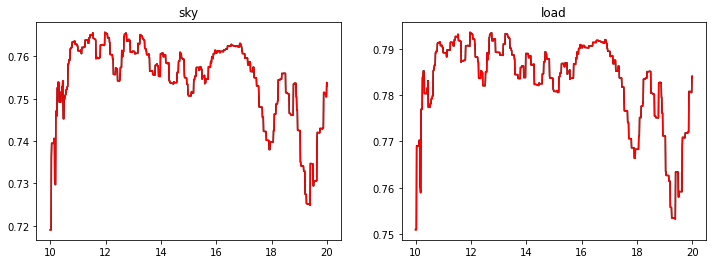

In [23]:
Gtot=hfilterBEM*hfilDC*GainDC*GainBEM*G1

############################################################################################################
###### plot of the different methods to obtain the betas (I1-I2) or (Tsky-Tload)
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(xx1,(JM_outputI1_bem/Gtot),color='k')
axs[0].set_title("sky")
axs[1].plot(xx1,(JM_outputI2_bem/Gtot),color='k')
axs[1].set_title("load")
axs[0].plot(xx1,(FsBem_SKY_Total2),color='r')
axs[1].plot(xx1,(FsBem_LOAD_Total2),color='r')


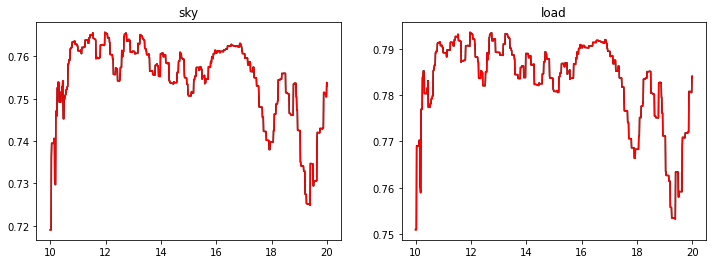

In [24]:
Gtot=hfilterBEM*hfilDC*GainDC*GainBEM*G1

############################################################################################################
###### plot of the different methods to obtain the betas (I1-I2) or (Tsky-Tload)
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(xx1,(JM_outputI1_bem/Gtot),color='k')
axs[0].set_title("sky")
axs[1].plot(xx1,(JM_outputI2_bem/Gtot),color='k')
axs[1].set_title("load")
axs[0].plot(xx1,(FsBem_SKY_Total2),color='r')
axs[1].plot(xx1,(FsBem_LOAD_Total2),color='r')

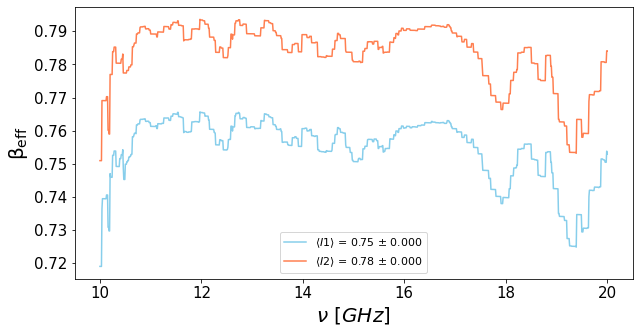

In [29]:

meanI1=np.mean(JM_outputI1_bem/Gtot)
#stdI1=np.std(JM_outputI1_bem/Gtot)

meanI2=np.mean(JM_outputI2_bem/Gtot)
#stdI2=np.std(JM_outputI1_bem/Gtot)

fig, ax1 = plt.subplots(figsize=(10, 5))
#plt.title(r'$  \beta^{\Delta T}_{sky} \ and \ \beta^{\Delta T}_{load}$', fontsize=20)
ax1.plot(xx1,JM_outputI1_bem/Gtot,color='skyblue',linestyle='solid',label=r'$\langle I1 \rangle$ = %.2f $\pm$ %.3f' % (meanI1, 0))
#plt.axhline(mean_bskyA1, color = 'skyblue', linewidth = 1,label=r'$\langle \beta_{\rm eff}^{\rm sky} \rangle$ = %.2f $\pm$ %.3f' % (mean_bskyA1, desv_Tsky),linestyle='--')
ax1.plot(xx1,JM_outputI2_bem/Gtot,color='coral',linestyle='solid',label=r'$\langle I2 \rangle$ = %.2f $\pm$ %.3f' % (meanI2, 0))
#plt.axhline(mean_bloadA1, color = 'coral', linewidth = 1,label=r'$ \langle \beta_{\rm eff}^{\rm load} \rangle$ = %.2f $\pm$ %.3f' % (mean_bloadA1,desv_Tload),linestyle='--')
ax1.tick_params(labelsize=15,axis='y',which='both')
ax1.set_ylabel(r'$\rm \beta_{eff}$',fontsize=20)
ax1.set_xlabel(r'$\nu \ [GHz]$',fontsize=20)
ax1.legend(loc='best', fontsize=11)
ax1.tick_params(labelsize=15,axis='both',which='both')
#plt.savefig('results_files_2/imagenes_cap2/results_input_sky_diff_load/betas_offset_t_INPUT_diff.pdf')
#plt.savefig('results_files_2/imagenes_cap2/results_input_sky_diff_load/betas_offset_t_INPUT_diff.png')
#plt.savefig('plots_paper/betas_offset_t.pdf')